## Daniel Suañez Ramirez PS4
### A simple wealth model
### Partial Equilibrium 

In [70]:
# Import packages

import numpy as np 
from numpy import vectorize
import matplotlib.pyplot as plt
from itertools import product

## Certainty Case

In [71]:
# Parameters of the model:

ro = 0.06
r = 0.04
w = 1
beta = 1/(1+ro)
gamma = 0
cbar = 100
sigmay = 0
ε=0.001 # tolerance


## Quadratic Utility
Infinitely-lived households economy

In [72]:

Y = [1-sigmay, 1+sigmay]
Y = np.array(Y)

A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:, 0]
ai = ay[:, 1]
aj = ay[:, 2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])


In [73]:
# Consumption:

c = y + (1+r)*ai - aj
    
@vectorize
  
def M(c):
    
    return -0.5*(c-cbar)**2
    
# Since we have the feasible constraints into account, now we can define the
# return matrix
     
M = M(c)
M = np.reshape(M, (1, 12800))
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:
    
def W1(A):
    
    return pi[0, 0]*(-0.5*(Y[0] + (1+r)*A - A - cbar)**2)/(1-beta) + pi[0, 1]*(-0.5*(Y[1] + (1+r)*A - A - cbar)**2)/(1-beta)

def W2(A):
    
    return pi[1, 0]*(-0.5*(Y[0] + (1+r)*A - A - cbar)**2)/(1-beta) + pi[1, 1]*(-0.5*(Y[1] + (1+r)*A - A - cbar)**2)/(1-beta)

        
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0


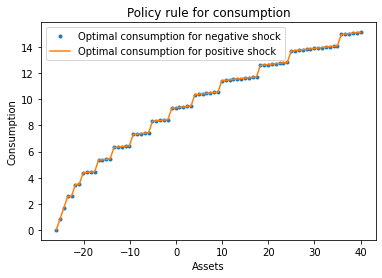

In [74]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

while np.any(abs(diffVs) > ε):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    

# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)
    
aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = np.zeros(80)
c_y2 = np.zeros(80)

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0, 80):
    
    if c_y1[i] <= 0:
        
        c_y1[i] = 0
        
    if c_y2[i] <= 0:
        
        c_y2[i] = 0
        
# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

Simulation time path for consumption

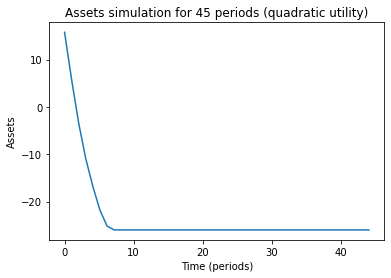

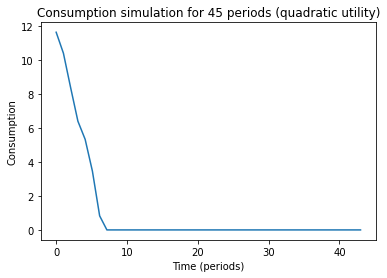

In [75]:
y = np.zeros([1, 80])

for i in range(0, 80):
    
    y[0, i] = 1  # In all cases, since gamma = 0, our y is going to be 1

# Simulation and plot for assets:
        
simulation = np.zeros(45)

aopt_y1 = A[g[0:80]]     # optimal decision of assets 

g_y1 = g[0:80]

simulation[0]  = g_y1[79] # our initial guess of assets  (a0)

for i in range(1, 45):
    
        simulation[i] = g_y1[int(simulation[i-1])]
        
for i in range(0, 44):
    
        simulation[i] = aopt_y1[int(simulation[i])]

          
t = np.linspace(0, 44, 44)

plt.figure()
plt.plot(t, simulation[0:44], label = 'Assets ')
plt.title('Assets simulation for 45 periods (quadratic utility)')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

c = np.zeros(44)

for i in range(0, 44):
    
    c[i] = simulation[i]*(1+r)+w*y[0, i]-simulation[i+1]
    
    if c[i] <= 0:
        c[i] = 0

plt.figure()
plt.plot(t[0:43], c[0:43], label = 'Consumption')
plt.title('Consumption simulation for 45 periods (quadratic utility)')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()


Finitely-lived households economy 

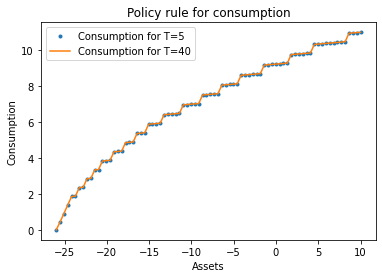

In [76]:
# T = 45
# Normalize W of T+1 to zero

# Quadratic utility:

A = np.linspace(((-(1+r)/r)*Y[0]), 10, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y+(1+r)*ai-aj

@vectorize
  
def M(c):
    
    return -0.5*(c-cbar)**2
     
M = M(c)
M = np.reshape(M,(1, 12800))
M = np.reshape(M,(160, 80))
W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0, 80):
    
    if C5[i] < 0:
        
        C5[i] = 0
    
    if C40[i] < 0:
        
        C40[i] = 0

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()


## CRRA Utility
Infinitely-lived households economy

In [77]:
r = 0.04
sigma = 2
A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y + (1+r)*ai - aj
        
M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:

def W1(A):   
    
    return pi[0, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[0, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

def W2(A):
    
    return pi[1, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[1, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

 
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0

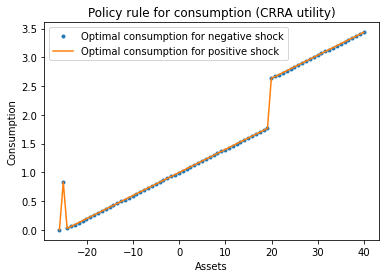

In [78]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)

aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0, 80):
    
    if c_y1[i] < 0:
        
        c_y1[i] = 0
    
    if c_y2[i] < 0:
        
        c_y2[i] = 0      
    
# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Policy rule for consumption (CRRA utility)')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

Simulation time paths for consumption

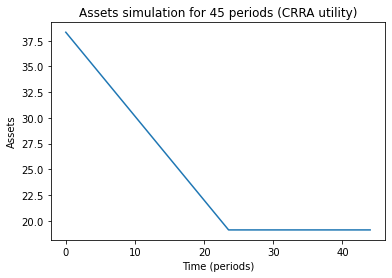

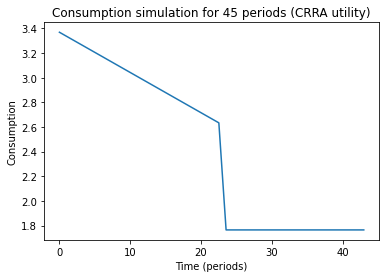

In [79]:
y = np.zeros([1, 80])

for i in range(0, 80):
    
    y[0, i] = 1  # In all cases, since gamma = 0, our y is going to be 1

# Simulation and plot for assets:
        
simulation = np.zeros(45)

aopt_y1 = A[g[0:80]]     # optimal decision of assets 

g_y1 = g[0:80]

simulation[0]  = g_y1[79] # our initial guess of assets  (a0)

for i in range(1, 45):
    
        simulation[i] = g_y1[int(simulation[i-1])]
        
for i in range(0, 44):
    
        simulation[i] = aopt_y1[int(simulation[i])]

          
t = np.linspace(0, 44, 44)

plt.figure()
plt.plot(t,simulation[0:44], label = 'Assets ')
plt.title('Assets simulation for 45 periods (CRRA utility)')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

c = np.zeros(44)

for i in range(0, 44):
    
    c[i] = simulation[i]*(1+r)+w*y[0, i]-simulation[i+1]
    
    if c[i] <= 0:
        c[i] = 0

plt.figure()
plt.plot(t[0:43], c[0:43], label = 'Consumption')
plt.title('Consumption simulation for 45 periods (CRRA utility)')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()

Finitely-lived households economy

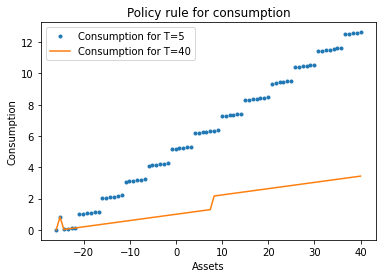

In [80]:
A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y+(1+r)*ai-aj

M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0, 80):
    
    if C5[i] < 0:
        
        C5[i] = 0
    
    if C40[i] < 0:
        
        C40[i] = 0

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

## Uncertainty Case


In [81]:
# Parameters of the model:

ro = 0.06
r = 0.04
w = 1
beta = 1/(1+ro)
gamma = 0       # Then we can change it for gamma equals to 0.95
cbar = 100
sigmay = 0.1    # Then we can change it for sigmay equals to 0.5

## Quadratic Utility
Infinitely-lived households economy 

In [82]:
Y = [1-sigmay, 1+sigmay]
Y = np.array(Y)

#if discrete

A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y+(1+r)*ai-aj

@vectorize
  
def M(c):
    
    return -0.5*(c-cbar)**2
     
M = M(c)
M = np.reshape(M, (1, 12800))
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:

def W1(A):   
    
    return pi[0, 0]*(-0.5*(Y[0] + (1+r)*A - A - cbar)**2)/(1-beta) + pi[0, 1]*(-0.5*(Y[1] + (1+r)*A - A - cbar)**2)/(1-beta)

def W2(A):
    
    return pi[1, 0]*(-0.5*(Y[0] + (1+r)*A - A - cbar)**2)/(1-beta) + pi[1, 1]*(-0.5*(Y[1] + (1+r)*A - A - cbar)**2)/(1-beta)

        
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0

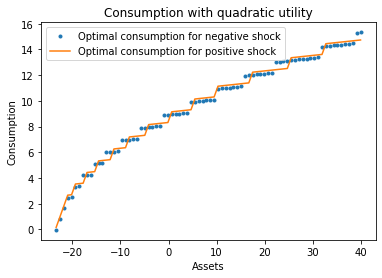

In [83]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)

aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Consumption with quadratic utility')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()


Finitely-lived households economy

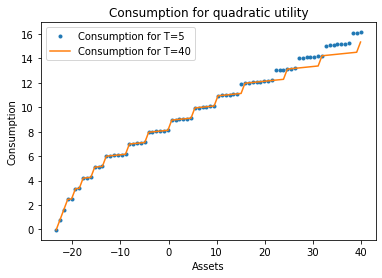

In [84]:
# T = 45
# Normalize W of T+1 to zero


W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

c = y+(1+r)*ai-aj

@vectorize
      
def M(c):
    
    return -0.5*(c-cbar)**2
         
M = M(c)
M = np.reshape(M,(1, 12800))
M = np.reshape(M,(160, 80))

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Consumption for quadratic utility')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

Simulation time paths for consumption

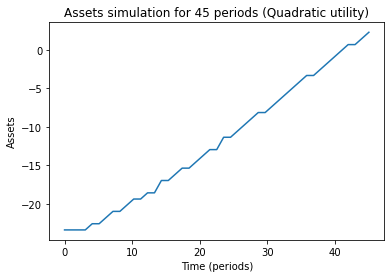

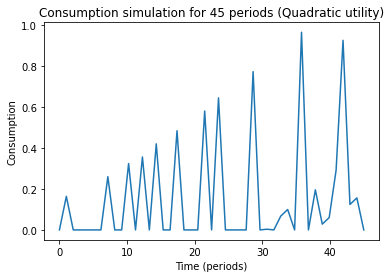

In [85]:
# Simulate the shocks of an economy for T = 45

t = np.linspace(0, 45, 45)

y = np.zeros([1, 45])

for i in range(0, 45):
    
    y[0, i] = np.random.choice((1-sigmay, 1+sigmay), p = ((1+gamma)/2, (1-gamma)/2))
 
aopt = np.zeros([45,1])

for i in range(0, 45):
    
    if y[0, i] < 1:
        
        aopt[i] = aopt_y1[i]
    
    if y[0, i] > 1:
        
        aopt[i] = aopt_y2[i]
        
c = np.zeros(45)

for i in range(0, 44):
    
    c[i] = aopt[i]*(1+r)+w*y[0, i]-aopt[i+1]
    
    if c[i] <= 0:
        c[i] = 0
        
plt.figure()
plt.plot(t, aopt, label = 'Assets')
plt.title('Assets simulation for 45 periods (Quadratic utility)')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

plt.figure()
plt.plot(t, c, label = 'Consumption')
plt.title('Consumption simulation for 45 periods (Quadratic utility)')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()

## CRRA Utility
Infinitely-lived households economy


In [86]:
sigma = 2       # Then we can change it for sigma equals to 5 and 20
sigmay = 0.1    # Then we can change it for sigmay equals to 0.5
gamma = 0       # Then we can change it for gamma equaks to 0.95
Y = [1-sigmay, 1+sigmay]
Y = np.array(Y)

#if discrete

A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:, 0]
ai = ay[:, 1]
aj = ay[:, 2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y+(1+r)*ai-aj
 
M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:

def W1(A):   
    
    return pi[0, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[0, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

def W2(A):
    
    return pi[1, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[1, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

        
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0


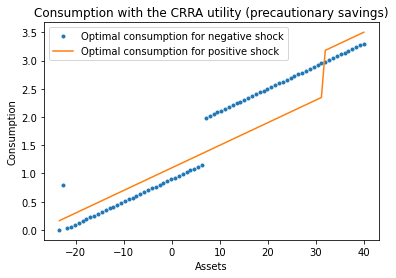

In [87]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)

aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0,80):
    
    if c_y1[i] < 0:
        c_y1[i] = 0
    
    if c_y2[i] < 0:
        c_y2[i] = 0   

# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Consumption with the CRRA utility (precautionary savings)')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

Finitely-lived households economy

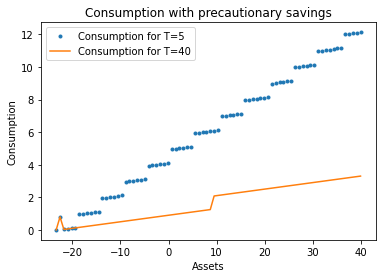

In [88]:
W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0,80):
    
    if C5[i] < 0:
        C5[i] = 0
    
    if C40[i] < 0:
        C40[i] = 0   
        
plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Consumption with precautionary savings')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()


Simulation time paths for consumption

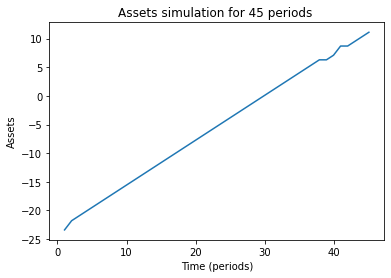

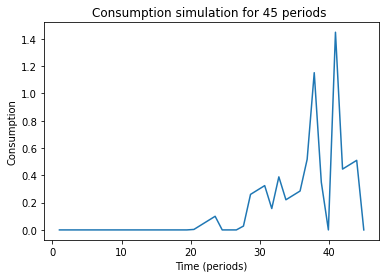

In [89]:
# Simulate the shocks of an economy for T = 45

t = np.linspace(0, 45, 45)

y = np.zeros([1, 45])

for i in range(0, 45):
    
    y[0, i] = np.random.choice((1-sigmay, 1+sigmay), p = ((1+gamma)/2, (1-gamma)/2))
 
aopt = np.zeros([45,1])

for i in range(0, 45):
    
    if y[0, i] < 1:
        
        aopt[i] = aopt_y1[i]
    
    if y[0, i] > 1:
        
        aopt[i] = aopt_y2[i]
        
c = np.zeros(45)

for i in range(0, 44):
    
    c[i] = aopt[i]*(1+r)+w*y[0, i]-aopt[i+1]
    
    if c[i] <= 0:
        c[i] = 0


plt.figure()
plt.plot(t[1:], aopt[1:], label = 'Assets')
plt.title('Assets simulation for 45 periods ')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

plt.figure()
plt.plot(t[1:], c[1:], label = 'Consumption')
plt.title('Consumption simulation for 45 periods ')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()

## Increase prudence by increasing $\sigma = \{2, 5, 20\} $

Since the above problem we used $\sigma =2$, now we take the others both

Using $\sigma = 5$

In [38]:
# Parameters of the model:

ro = 0.06
r = 0.04
w = 1
beta = 1/(1+ro)
gamma = 0       # Then we can change it for gamma equals to 0.95
cbar = 100
sigmay = 0.1    # Then we can change it for sigmay equals to 0.5

In [39]:
r = 0.04
sigma = 5
A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y + (1+r)*ai - aj
        
M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:

def W1(A):   
    
    return pi[0, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[0, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

def W2(A):
    
    return pi[1, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[1, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

 
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0

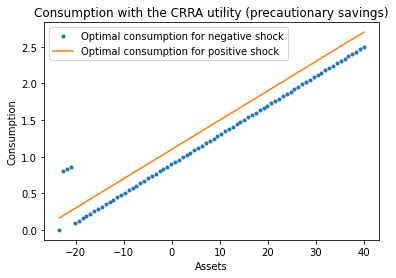

In [40]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)

aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0,80):
    
    if c_y1[i] < 0:
        c_y1[i] = 0
    
    if c_y2[i] < 0:
        c_y2[i] = 0   

# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Consumption with the CRRA utility (precautionary savings)')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

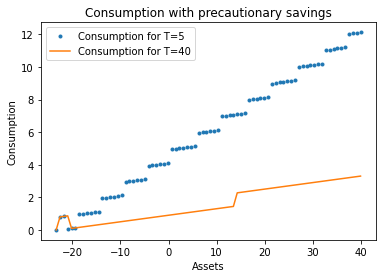

In [41]:
W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0,80):
    
    if C5[i] < 0:
        C5[i] = 0
    
    if C40[i] < 0:
        C40[i] = 0   
        
plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Consumption with precautionary savings')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()


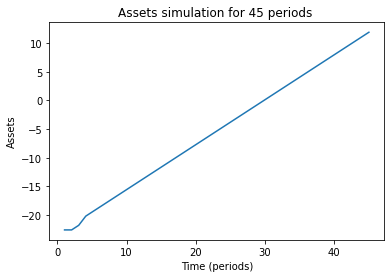

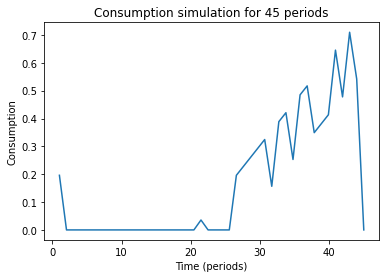

In [42]:
# Simulate the shocks of an economy for T = 45

t = np.linspace(0, 45, 45)

y = np.zeros([1, 45])

for i in range(0, 45):
    
    y[0, i] = np.random.choice((1-sigmay, 1+sigmay), p = ((1+gamma)/2, (1-gamma)/2))
 
aopt = np.zeros([45,1])

for i in range(0, 45):
    
    if y[0, i] < 1:
        
        aopt[i] = aopt_y1[i]
    
    if y[0, i] > 1:
        
        aopt[i] = aopt_y2[i]
        
c = np.zeros(45)

for i in range(0, 44):
    
    c[i] = aopt[i]*(1+r)+w*y[0, i]-aopt[i+1]
    
    if c[i] <= 0:
        c[i] = 0


plt.figure()
plt.plot(t[1:], aopt[1:], label = 'Assets')
plt.title('Assets simulation for 45 periods ')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

plt.figure()
plt.plot(t[1:], c[1:], label = 'Consumption')
plt.title('Consumption simulation for 45 periods')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()

Using $\sigma =20$

In [43]:
r = 0.04
sigma = 20
A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y + (1+r)*ai - aj
        
M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:

def W1(A):   
    
    return pi[0, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[0, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

def W2(A):
    
    return pi[1, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[1, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

 
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0

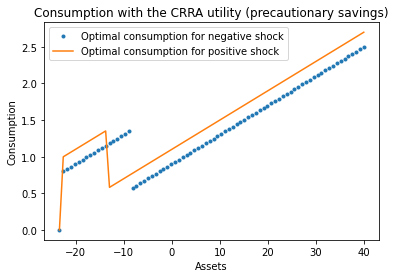

In [44]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)

aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0,80):
    
    if c_y1[i] < 0:
        c_y1[i] = 0
    
    if c_y2[i] < 0:
        c_y2[i] = 0   

# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Consumption with the CRRA utility (precautionary savings)')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

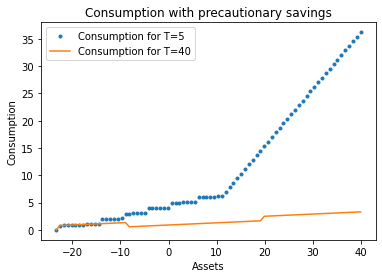

In [45]:
W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0,80):
    
    if C5[i] < 0:
        C5[i] = 0
    
    if C40[i] < 0:
        C40[i] = 0   
        
plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Consumption with precautionary savings')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

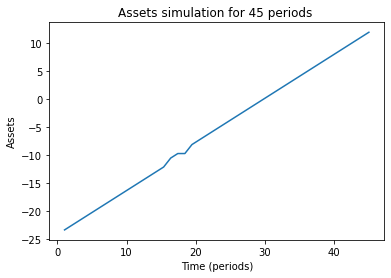

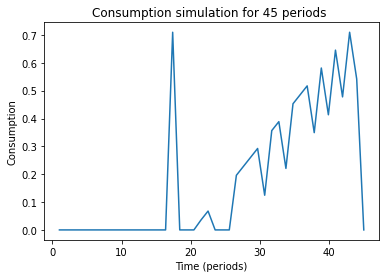

In [46]:
# Simulate the shocks of an economy for T = 45

t = np.linspace(0, 45, 45)

y = np.zeros([1, 45])

for i in range(0, 45):
    
    y[0, i] = np.random.choice((1-sigmay, 1+sigmay), p = ((1+gamma)/2, (1-gamma)/2))
 
aopt = np.zeros([45,1])

for i in range(0, 45):
    
    if y[0, i] < 1:
        
        aopt[i] = aopt_y1[i]
    
    if y[0, i] > 1:
        
        aopt[i] = aopt_y2[i]
        
c = np.zeros(45)

for i in range(0, 44):
    
    c[i] = aopt[i]*(1+r)+w*y[0, i]-aopt[i+1]
    
    if c[i] <= 0:
        c[i] = 0


plt.figure()
plt.plot(t[1:], aopt[1:], label = 'Assets')
plt.title('Assets simulation for 45 periods ')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

plt.figure()
plt.plot(t[1:], c[1:], label = 'Consumption')
plt.title('Consumption simulation for 45 periods ')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()

## Now we increase the variance of the income shock $\sigma_y = 0.5$

### Quadratic Utility

In [47]:
# Parameters of the model:

ro = 0.06
r = 0.04
w = 1
beta = 1/(1+ro)
gamma = 0
cbar = 100
sigmay = 0.5

In [48]:
Y = [1-sigmay, 1+sigmay]
Y = np.array(Y)

A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:, 0]
ai = ay[:, 1]
aj = ay[:, 2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

In [49]:
# Consumption:

c = y + (1+r)*ai - aj
    
@vectorize
  
def M(c):
    
    return -0.5*(c-cbar)**2
    
# Since we have the feasible constraints into account, now we can define the
# return matrix
     
M = M(c)
M = np.reshape(M, (1, 12800))
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:
    
def W1(A):
    
    return pi[0, 0]*(-0.5*(Y[0] + (1+r)*A - A - cbar)**2)/(1-beta) + pi[0, 1]*(-0.5*(Y[1] + (1+r)*A - A - cbar)**2)/(1-beta)

def W2(A):
    
    return pi[1, 0]*(-0.5*(Y[0] + (1+r)*A - A - cbar)**2)/(1-beta) + pi[1, 1]*(-0.5*(Y[1] + (1+r)*A - A - cbar)**2)/(1-beta)

        
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0


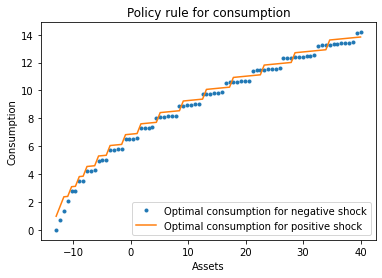

In [50]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    

# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)
    
aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = np.zeros(80)
c_y2 = np.zeros(80)

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0, 80):
    
    if c_y1[i] <= 0:
        
        c_y1[i] = 0
        
    if c_y2[i] <= 0:
        
        c_y2[i] = 0
        
# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

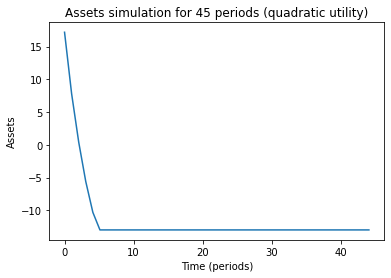

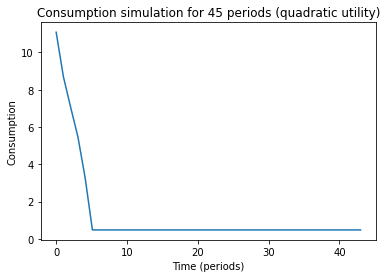

In [51]:
y = np.zeros([1, 80])

for i in range(0, 80):
    
    y[0, i] = 1  # In all cases, since gamma = 0, our y is going to be 1

# Simulation and plot for assets:
        
simulation = np.zeros(45)

aopt_y1 = A[g[0:80]]     # optimal decision of assets 

g_y1 = g[0:80]

simulation[0]  = g_y1[79] # our initial guess of assets  (a0)

for i in range(1, 45):
    
        simulation[i] = g_y1[int(simulation[i-1])]
        
for i in range(0, 44):
    
        simulation[i] = aopt_y1[int(simulation[i])]

          
t = np.linspace(0, 44, 44)

plt.figure()
plt.plot(t, simulation[0:44], label = 'Assets ')
plt.title('Assets simulation for 45 periods (quadratic utility)')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

c = np.zeros(44)

for i in range(0, 44):
    
    c[i] = simulation[i]*(1+r)+w*y[0, i]-simulation[i+1]
    
    if c[i] <= 0:
        c[i] = 0

plt.figure()
plt.plot(t[0:43], c[0:43], label = 'Consumption')
plt.title('Consumption simulation for 45 periods (quadratic utility)')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()


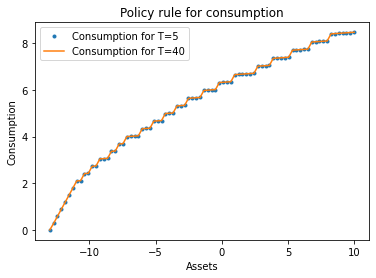

In [52]:
# T = 45
# Normalize W of T+1 to zero

# Quadratic utility:

A = np.linspace(((-(1+r)/r)*Y[0]), 10, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y+(1+r)*ai-aj

@vectorize
  
def M(c):
    
    return -0.5*(c-cbar)**2
     
M = M(c)
M = np.reshape(M,(1, 12800))
M = np.reshape(M,(160, 80))
W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0, 80):
    
    if C5[i] < 0:
        
        C5[i] = 0
    
    if C40[i] < 0:
        
        C40[i] = 0

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()


## CRRA Utility

In [53]:
r = 0.04
sigma = 2
A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y + (1+r)*ai - aj
        
M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:

def W1(A):   
    
    return pi[0, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[0, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

def W2(A):
    
    return pi[1, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[1, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

 
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0

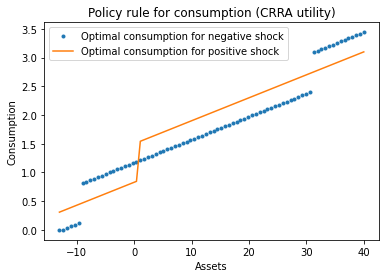

In [54]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)

aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0, 80):
    
    if c_y1[i] < 0:
        
        c_y1[i] = 0
    
    if c_y2[i] < 0:
        
        c_y2[i] = 0      
    
# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Policy rule for consumption (CRRA utility)')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

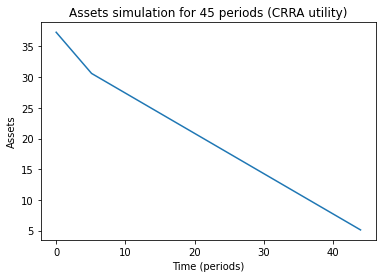

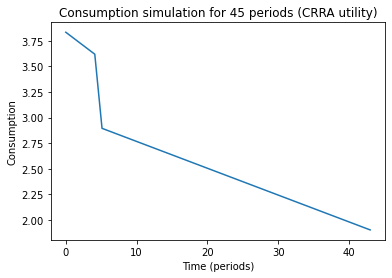

In [55]:
y = np.zeros([1, 80])

for i in range(0, 80):
    
    y[0, i] = 1  # In all cases, since gamma = 0, our y is going to be 1

# Simulation and plot for assets:
        
simulation = np.zeros(45)

aopt_y1 = A[g[0:80]]     # optimal decision of assets 

g_y1 = g[0:80]

simulation[0]  = g_y1[79] # our initial guess of assets  (a0)

for i in range(1, 45):
    
        simulation[i] = g_y1[int(simulation[i-1])]
        
for i in range(0, 44):
    
        simulation[i] = aopt_y1[int(simulation[i])]

          
t = np.linspace(0, 44, 44)

plt.figure()
plt.plot(t,simulation[0:44], label = 'Assets ')
plt.title('Assets simulation for 45 periods (CRRA utility)')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

c = np.zeros(44)

for i in range(0, 44):
    
    c[i] = simulation[i]*(1+r)+w*y[0, i]-simulation[i+1]
    
    if c[i] <= 0:
        c[i] = 0

plt.figure()
plt.plot(t[0:43], c[0:43], label = 'Consumption')
plt.title('Consumption simulation for 45 periods (CRRA utility)')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()

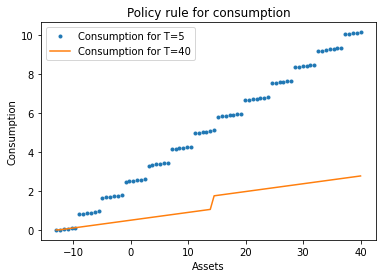

In [56]:
A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y+(1+r)*ai-aj

M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0, 80):
    
    if C5[i] < 0:
        
        C5[i] = 0
    
    if C40[i] < 0:
        
        C40[i] = 0

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

## Increase $\gamma = 0.95$

## Quadratic Utility

In [57]:
# Parameters of the model:

ro = 0.06
r = 0.04
w = 1
beta = 1/(1+ro)
gamma = 0.95
cbar = 100
sigmay = 0.5

In [58]:
Y = [1-sigmay, 1+sigmay]
Y = np.array(Y)

A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:, 0]
ai = ay[:, 1]
aj = ay[:, 2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

In [59]:
# Consumption:

c = y + (1+r)*ai - aj
    
@vectorize
  
def M(c):
    
    return -0.5*(c-cbar)**2
    
# Since we have the feasible constraints into account, now we can define the
# return matrix
     
M = M(c)
M = np.reshape(M, (1, 12800))
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:
    
def W1(A):
    
    return pi[0, 0]*(-0.5*(Y[0] + (1+r)*A - A - cbar)**2)/(1-beta) + pi[0, 1]*(-0.5*(Y[1] + (1+r)*A - A - cbar)**2)/(1-beta)

def W2(A):
    
    return pi[1, 0]*(-0.5*(Y[0] + (1+r)*A - A - cbar)**2)/(1-beta) + pi[1, 1]*(-0.5*(Y[1] + (1+r)*A - A - cbar)**2)/(1-beta)

        
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0

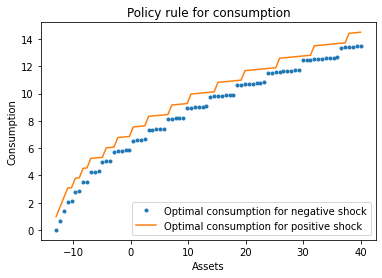

In [60]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    

# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)
    
aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = np.zeros(80)
c_y2 = np.zeros(80)

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0, 80):
    
    if c_y1[i] <= 0:
        
        c_y1[i] = 0
        
    if c_y2[i] <= 0:
        
        c_y2[i] = 0
        
# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

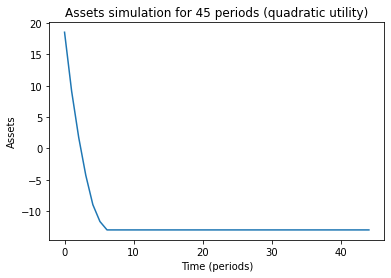

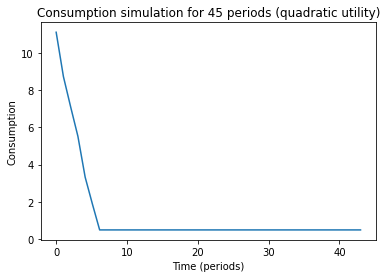

In [61]:
y = np.zeros([1, 80])

for i in range(0, 80):
    
    y[0, i] = 1  # In all cases, since gamma = 0, our y is going to be 1

# Simulation and plot for assets:
        
simulation = np.zeros(45)

aopt_y1 = A[g[0:80]]     # optimal decision of assets 

g_y1 = g[0:80]

simulation[0]  = g_y1[79] # our initial guess of assets  (a0)

for i in range(1, 45):
    
        simulation[i] = g_y1[int(simulation[i-1])]
        
for i in range(0, 44):
    
        simulation[i] = aopt_y1[int(simulation[i])]

          
t = np.linspace(0, 44, 44)

plt.figure()
plt.plot(t, simulation[0:44], label = 'Assets ')
plt.title('Assets simulation for 45 periods (quadratic utility)')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

c = np.zeros(44)

for i in range(0, 44):
    
    c[i] = simulation[i]*(1+r)+w*y[0, i]-simulation[i+1]
    
    if c[i] <= 0:
        c[i] = 0

plt.figure()
plt.plot(t[0:43], c[0:43], label = 'Consumption')
plt.title('Consumption simulation for 45 periods (quadratic utility)')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()


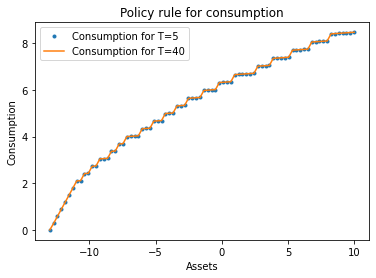

In [62]:
# T = 45
# Normalize W of T+1 to zero

# Quadratic utility:

A = np.linspace(((-(1+r)/r)*Y[0]), 10, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y+(1+r)*ai-aj

@vectorize
  
def M(c):
    
    return -0.5*(c-cbar)**2
     
M = M(c)
M = np.reshape(M,(1, 12800))
M = np.reshape(M,(160, 80))
W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0, 80):
    
    if C5[i] < 0:
        
        C5[i] = 0
    
    if C40[i] < 0:
        
        C40[i] = 0

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

## CRRA Utility

In [63]:
r = 0.04
sigma = 2
A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y + (1+r)*ai - aj
        
M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

# Initial guess for the value function is a vector of zeros:

Vs = np.zeros(160)

# Compute the matrix W:

def W1(A):   
    
    return pi[0, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[0, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

def W2(A):
    
    return pi[1, 0]*(((Y[0] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta)) + pi[1, 1]*(((Y[1] + (1+r)*A - A)**(1-sigma))-1)/((1-sigma)*(1-beta))

 
W1 = W1(A)
W1 = np.reshape(W1, (80,1))
W1 = np.tile(W1, 80)
W1 = np.transpose(W1)

W2 = W2(A)
W2 = np.reshape(W2, (80,1))
W2 = np.tile(W2, 80)
W2 = np.transpose(W2)

W = [W1, W2]
W = np.reshape(W, (160,80))

# Compute the matrix X:

X = M + beta*W

Vs1 = np.amax(X, axis = 1)

diffVs = Vs - Vs1

count = 0

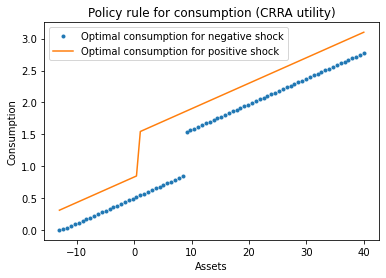

In [64]:
# If differences are larger than 1, we iterate taking as new value functions 
# Vs1 up to obtain convergence:

for diffVs in range(1, 8000):
    
    Vss = Vs1
    Vs = [Vss[0:80], Vss[80:]]
    Vs = np.array(Vs)
    
    def W1(Vs):
        
        return pi[0, 0]*Vs[0, :] + pi[0, 1]*Vs[1, :]
    
    def W2(Vs):
        
        return pi[1, 0]*Vs[0, :] + pi[1, 1]*Vs[1, :]

    W1 = W1(Vs)
    W1 = np.reshape(W1, (1,80))
    W1 = np.tile(W1, 80)
    W1 = np.reshape(W1, (80,80))

    W2 = W2(Vs)
    W2 = np.reshape(W2, (1,80))
    W2 = np.tile(W2, 80)
    W2 = np.reshape(W2, (80,80))
    
    W = [W1, W2]
    W = np.reshape(W, (160, 80))
    
    X = M + beta*W
    
    Vs1 = np.amax(X, axis = 1)
    
    diffVs = Vss - Vs1
    
    count += 1
    
# Once we obtain convergence, redefine the matrix X:
    
X = M + beta*W

# The value function given different realizations of y:

V_y1 = Vs1[0:80]
V_y2 = Vs1[80:]

# Now we can obtain the decision rule, which give us column number that
# maximizes row i of the X matrix:

g = np.argmax(X, axis = 1)

aopt_y1 = A[g[0:80]]   # optimal decision of assets given y1
aopt_y2 = A[g[80:]]    # optimal decision of assets given y2

c_y1 = Y[0]*np.ones(80) + (1+r)*A - aopt_y1

c_y2 = Y[1]*np.ones(80) + (1+r)*A - aopt_y2

for i in range(0, 80):
    
    if c_y1[i] < 0:
        
        c_y1[i] = 0
    
    if c_y2[i] < 0:
        
        c_y2[i] = 0      
    
# Plot the value function and the optimal policy:

plt.figure()
plt.plot(A, c_y1, '.', label = 'Optimal consumption for negative shock')
plt.plot(A, c_y2, label = 'Optimal consumption for positive shock')
plt.title('Policy rule for consumption (CRRA utility)')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()

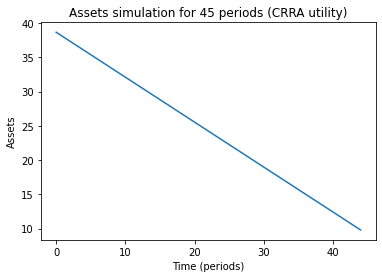

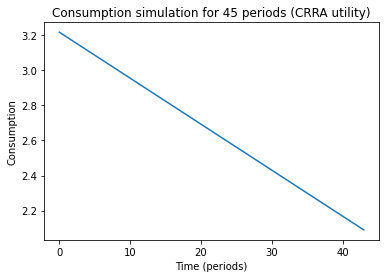

In [65]:
y = np.zeros([1, 80])

for i in range(0, 80):
    
    y[0, i] = 1  # In all cases, since gamma = 0, our y is going to be 1

# Simulation and plot for assets:
        
simulation = np.zeros(45)

aopt_y1 = A[g[0:80]]     # optimal decision of assets 

g_y1 = g[0:80]

simulation[0]  = g_y1[79] # our initial guess of assets  (a0)

for i in range(1, 45):
    
        simulation[i] = g_y1[int(simulation[i-1])]
        
for i in range(0, 44):
    
        simulation[i] = aopt_y1[int(simulation[i])]

          
t = np.linspace(0, 44, 44)

plt.figure()
plt.plot(t,simulation[0:44], label = 'Assets ')
plt.title('Assets simulation for 45 periods (CRRA utility)')
plt.ylabel('Assets')
plt.xlabel('Time (periods)')
plt.show()

# Simulation and plot for consumption:

c = np.zeros(44)

for i in range(0, 44):
    
    c[i] = simulation[i]*(1+r)+w*y[0, i]-simulation[i+1]
    
    if c[i] <= 0:
        c[i] = 0

plt.figure()
plt.plot(t[0:43], c[0:43], label = 'Consumption')
plt.title('Consumption simulation for 45 periods (CRRA utility)')
plt.ylabel('Consumption')
plt.xlabel('Time (periods)')
plt.show()

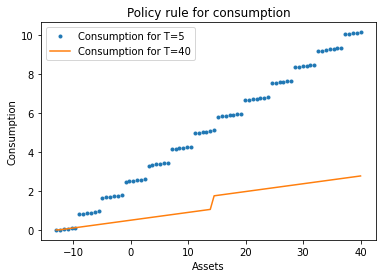

In [66]:
A = np.linspace(((-(1+r)/r)*Y[0]), 40, 80)

# Create the matrix A*Y, where there are all possible combinations of
# assets (today and tomorrow) and shocks:

ay = list(product(Y, A, A))
ay = np.array(ay)

y = ay[:,0]
ai = ay[:,1]
aj = ay[:,2]

# Transition matrix:

pi = np.array([((1+gamma)/2, (1-gamma)/2), ((1-gamma)/2, (1+gamma)/2)])

c = y+(1+r)*ai-aj

M = np.zeros(12800)

for i in range(0, 12800):
    
    if c[i] >= 0:
        
        M[i] = ((c[i]**(1-sigma))-1)/(1-sigma)
        
    if c[i] < 0:
        
        M[i] = -100000

M = np.reshape(M, (1, 12800))        
M = np.reshape(M, (160, 80))

W = np.zeros(160*80)
W = np.reshape(W, (160,80))

count = 0
finiteV = []
finiteG = []

for count in range(1, 46):
    
    X = M + beta*W
    g = np.argmax(X, axis = 1)
    W = np.amax(X, axis = 1)
    
    finiteV.append(W)       # It stores each iteration for obtaining the value function at each period (or age)
    finiteG.append(g)
    
    W = np.reshape(W, [160,1])
    W = np.tile(W, 80)
    W = np.transpose(W)
    W1 = W[:80, :80]
    W2 = W[:80, 80:]
    W = np.concatenate((W1, W2))
    count = count+1
    
finiteV = np.array(finiteV)
finiteV = np.transpose(finiteV)
finiteG = np.array(finiteG)
finiteG = np.transpose(finiteG)

# Individual at periods 5 and 40:

A5 = A[finiteG[0:80, 5]]
A40 = A[finiteG[0:80, 40]]

C5 = Y[0]*np.ones(80) + (1+r)*A - A5
C40 = Y[0]*np.ones(80) + (1+r)*A - A40

for i in range(0, 80):
    
    if C5[i] < 0:
        
        C5[i] = 0
    
    if C40[i] < 0:
        
        C40[i] = 0

plt.figure()
plt.plot(A, C5,'.', label = 'Consumption for T=5')
plt.plot(A, C40, label = 'Consumption for T=40')
plt.title('Policy rule for consumption')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Assets')
plt.show()